> # 6 학습 관련 기술들

## 6.1 매개변수 갱신

- 최적화: 매개변수의 최적값을 찾는 문제
- 확률적 경사 하강법(SGD): 매개변수의 기울기를 구해 기울어진 방향으로 갱신

### 6.1.1 모험가 이야기

### 6.1.2 확률적 경사 하강법(SGD)

## <center>$W \leftarrow W - \eta \frac{\partial L}{\partial W}$</center>

#### SGD의 구현

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def updata(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
'''
# 다음과 같이 사용 가능

network = TwoLayeret(...)
optimizer = SGD()

for i in range(10000):
    ...
    x.batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

'''

'\n# 다음과 같이 사용 가능\n\nnetwork = TwoLayeret(...)\noptimizer = SGD()\n\nfor i in range(10000):\n    ...\n    x.batch, t_batch = get_mini_batch(...) # 미니배치\n    grads = network.gradient(x_batch, t_batch)\n    params = network.params\n    optimizer.update(params, grads)\n    ...\n\n'

- 최적화를 담당하는 클래스는 분리하는 것이 모듈화 하기 좋음
- SGD, Momentum 등 상황에 따라 다른 방법을 사용할 수 있기 때문

### 6.1.3 SGD의 단점

- 비등방성 함수에서는 탐색 경로가 비효율적

### 6.1.4 모멘텀

## <center>$\mathbf{v} \leftarrow \alpha \mathbf{v} - \eta \frac{\partial L}{\partial W}$</center>
## <center>$W \leftarrow W + \mathbf{v}$</center>

- v는 물리에서 말하는 속도에 해당
- αv 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강 시키는 역할(α는 0.9 등)

#### 모멘텀의 구현

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad

- 신경망에서 학습률이 작으면 시간이 너무 길어지고, 너무 크면 학습이 잘 안될 가능성
- 학습률을 정하는 효과적 기술 -> 학습률 감소

## <center>$\mathbf{h} \leftarrow \mathbf{h} + \frac{\partial L}{\partial W} \bigodot \frac{\partial L}{\partial W}$</center>

## <center>$W \leftarrow W- \eta \frac{1}{\sqrt{\mathbf{h}}} \frac{\partial L}{\partial W}$</center>

- h는 기존 기울기 값을 제곱하여 계속 더해줌
- ⨀ 기호는 행렬의 원소별 곱셈을 뜻함
- 매개변수를 갱신할 때 1/√h를 곱해 학습률 조정
- 어느 순간 갱신량이 0이 될 문제를 개선하기 위해 'RMSProp' 방법 도입
- 먼 과거의 기울기 정보는 서서히 잊고 새로운 기울기 정보 크게 반영
- 지수이동평균(EMA)의 방법

#### AdaGrad의 구현

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

- 마지막 줄의 1e-7이라는 작은 값은 self.h[key]가 0이라도 0으로 나누는 사태를 막아줌
- 처음의 큰 움직임에 비례해 갱신 강도도 빠르게 약해짐

### 6.1.6 Adam

- 모멘텀의 움직임과 AdaGrad의 갱신 정도를 융합
- 2015년 제안된 방법
- 하이퍼파라미터의 '편향 보정'이 진행
- 자세한 사항은 논문이나 관련 자료를 살펴볼 것
- 하이퍼파라미터 3개를 설정 학습률, 일차 모멘텀용 계수 $\beta_{1}$,  이차 모멘텀용 계수 $\beta_{2}$
- 보통 $\beta_{1}$은 0.9, $\beta_{2}$는 0.999

### 6.1.7 어느 갱신 방법을 이용할 것인가?

- 갱신 방법은 풀어야 할 문제에 따라 달라짐

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

- 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고 때로는 최종 정확도도 높음

## 6.2 가중치의 초깃값

### 6.2.1 초깃값을 0으로 하면?

- 가중치 값을 작게하면 오버피팅을 막을 수 있음
- 보통 정규분포에서 생성된 아주 작은 값을 사용
- 0을 사용하면 학습이 올바로 이루어지지 않음
- 정확히는 가중치가 균일한 값이면 오차역전파법에서 모든 가중치가 똑같이 갱신 되기 때문

### 6.2.2 은닉층의 활성화값 분포

- 은닉층 활성화 함수의 출력 데이터 분포를 관찰하면 중요한 정보를 얻을 수 있음
- 가중치의 초깃값에 따라 활성화 값들이 어떻게 바뀌는가?

#### 가중치를 표준편차가 1인 정규분포 이용

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층 노드 수
hidden_layer_size = 5 # 은닉층의 수
activations = {} # 활성화 값을 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

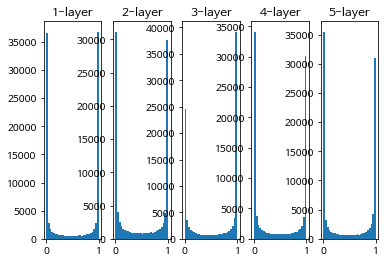

In [17]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

- 시그모이드 함수의 출력이 0에 가까워지면 미분도 0에 다가감
- 데이터가 0과 1에 치우쳐 분포하게 되면
- 역전파의 기울기 값이 점점 작아지다가 사라짐 -> 기울기 소실

#### 가중치를 표준편차가 0.01인 정규분포 이용

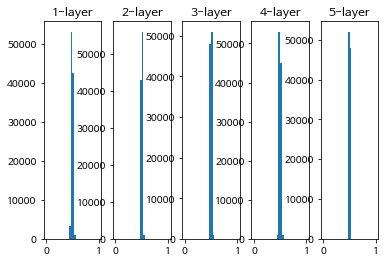

In [19]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01 # 표준 편차가 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

- 기울기 소실에 문제가 나타나진 않았음
- 그러나 0.5 부근에 활성화 값 집중으로 인해 표현력에 큰 문제
- 노드를 여러 개 둔 의미가 없어짐
- 따라서, 각 층의 활성화 값은 고루 분포되어야 함

#### Xavier 초깃값(사비에르 글로로트, 요슈아 벤지오가 권장하는 가중치 초깃값)

- 앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용

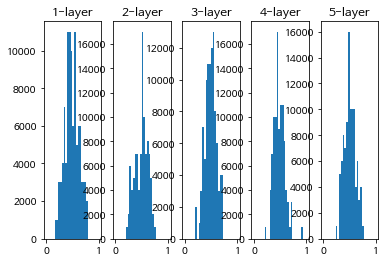

In [23]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

- 층이 깊어질수록 일그러짐이 있는 현상은 tanh 함수로 개선 가능
- 활성화 함수로는 tanh 처럼 원점에서 대칭인 함수가 바람직

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

- Xavier 초깃값은 활성화 함수가 선형인 것을 전제
- ReLU를 이용할 땐 He 초깃값을 사용
- 앞 계층의 노드가 n개일 때, $\frac{2}{\sqrt{n}}$인 정규분포를 사용
- 직관적으로 ReLU는 음의 영역이 0이라서 더 넓게 분포시켜야 하기 때문

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
===========iteration:0===========
std=0.01:2.3025416534301524
Xavier:2.3261388180509934
He:2.4930270083734367
===========iteration:100===========
std=0.01:2.301763659598152
Xavier:2.2264851294606487
He:1.4899607630664131
===========iteration:200===========
std=0.01:2.302004727187289
Xavier:2.111163634244283
He:0.8263750309550091
===========iteration:300===========
std=0.01:2.3019528432838614
Xavier:1.7947802574954124
He:0.5547171683410306
===========iteration:400===========
std=0.01:2.302673130057641
Xavier:1.1968129357544275
He:0.4374533765853428
===========iteration:500===========
std=0.01:2.3010962197898435
Xavier:0.8744735694027197
He:0.4394262915193668
===========iteration:600===========
std=0.01:2.3034018236

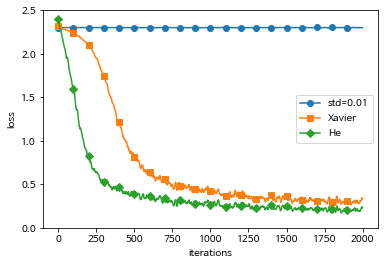

In [24]:
%run weight_init_compare.py

- std = 0.01에서는 순전파 때 너무 작은 값이 흐르므로 학습이 전혀 이뤄지지 않음
- Xavier, He 초깃값에서는 학습이 순조롭게 이뤄짐

## 6.3 배치 정규화

- 각 층의 활성화를 적당히 퍼뜨리도록 강제한다면?

### 6.3.1 배치 정규화 알고리즘

- 학습을 빨리 진행할 수 있다.
- 초깃값에 크게 의존하지 않는다.
- 오버피팅을 억제한다.
- 배치 정규화 계층을 신경망에 삽입
- (Affine $\rightarrow$ 'Batch Norm' $\rightarrow$ ReLu) $\rightarrow$ (Affine ...
- 정확히는 표준화인데, 넓은 범위에서 정규화라고 하는 듯
- 또, 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동 변환을 수행
- $y_{i} \leftarrow \gamma \hat{x}_{i} + \beta$와 같음

### 6.3.2 배치 정규화의 효과

============== 1/16 ==============
epoch:0 | 0.117 - 0.113
epoch:1 | 0.097 - 0.102


D:\jupyterN\Scratch_DL\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\jupyterN\Scratch_DL\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\jupyterN\Scratch_DL\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
D:\jupyterN\Scratch_DL\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\Users\JH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:2 | 0.097 - 0.117
epoch:3 | 0.097 - 0.13
epoch:4 | 0.097 - 0.145
epoch:5 | 0.097 - 0.172
epoch:6 | 0.097 - 0.192
epoch:7 | 0.097 - 0.213
epoch:8 | 0.097 - 0.232
epoch:9 | 0.097 - 0.236
epoch:10 | 0.097 - 0.254
epoch:11 | 0.097 - 0.267
epoch:12 | 0.097 - 0.283
epoch:13 | 0.097 - 0.303
epoch:14 | 0.097 - 0.315
epoch:15 | 0.097 - 0.324
epoch:16 | 0.097 - 0.329
epoch:17 | 0.097 - 0.345


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.359
epoch:19 | 0.097 - 0.368
============== 2/16 ==============
epoch:0 | 0.104 - 0.102
epoch:1 | 0.097 - 0.103
epoch:2 | 0.097 - 0.105
epoch:3 | 0.097 - 0.122
epoch:4 | 0.097 - 0.153
epoch:5 | 0.097 - 0.172
epoch:6 | 0.097 - 0.202
epoch:7 | 0.097 - 0.222
epoch:8 | 0.097 - 0.246
epoch:9 | 0.097 - 0.27
epoch:10 | 0.097 - 0.293
epoch:11 | 0.097 - 0.326
epoch:12 | 0.097 - 0.36
epoch:13 | 0.097 - 0.381
epoch:14 | 0.097 - 0.4
epoch:15 | 0.097 - 0.424
epoch:16 | 0.097 - 0.437
epoch:17 | 0.097 - 0.458
epoch:18 | 0.097 - 0.477
epoch:19 | 0.097 - 0.491


No handles with labels found to put in legend.


============== 3/16 ==============
epoch:0 | 0.097 - 0.067
epoch:1 | 0.276 - 0.088
epoch:2 | 0.393 - 0.127
epoch:3 | 0.467 - 0.183
epoch:4 | 0.534 - 0.221
epoch:5 | 0.603 - 0.264
epoch:6 | 0.643 - 0.306
epoch:7 | 0.682 - 0.347
epoch:8 | 0.722 - 0.384
epoch:9 | 0.747 - 0.416
epoch:10 | 0.757 - 0.453
epoch:11 | 0.804 - 0.465
epoch:12 | 0.813 - 0.492
epoch:13 | 0.827 - 0.514
epoch:14 | 0.847 - 0.534
epoch:15 | 0.86 - 0.55
epoch:16 | 0.875 - 0.568
epoch:17 | 0.886 - 0.589
epoch:18 | 0.901 - 0.592


No handles with labels found to put in legend.


epoch:19 | 0.906 - 0.612
============== 4/16 ==============
epoch:0 | 0.106 - 0.095
epoch:1 | 0.306 - 0.134
epoch:2 | 0.431 - 0.206
epoch:3 | 0.526 - 0.279
epoch:4 | 0.605 - 0.351
epoch:5 | 0.649 - 0.401
epoch:6 | 0.705 - 0.45
epoch:7 | 0.716 - 0.501
epoch:8 | 0.748 - 0.541
epoch:9 | 0.771 - 0.578
epoch:10 | 0.785 - 0.619
epoch:11 | 0.797 - 0.662
epoch:12 | 0.802 - 0.682
epoch:13 | 0.811 - 0.704
epoch:14 | 0.818 - 0.718
epoch:15 | 0.825 - 0.734
epoch:16 | 0.836 - 0.766
epoch:17 | 0.862 - 0.777


No handles with labels found to put in legend.


epoch:18 | 0.842 - 0.785
epoch:19 | 0.861 - 0.799
============== 5/16 ==============
epoch:0 | 0.111 - 0.106
epoch:1 | 0.113 - 0.14
epoch:2 | 0.123 - 0.277
epoch:3 | 0.129 - 0.436
epoch:4 | 0.138 - 0.552
epoch:5 | 0.152 - 0.613
epoch:6 | 0.155 - 0.673
epoch:7 | 0.164 - 0.705
epoch:8 | 0.169 - 0.737
epoch:9 | 0.18 - 0.764
epoch:10 | 0.183 - 0.791
epoch:11 | 0.191 - 0.804
epoch:12 | 0.198 - 0.823
epoch:13 | 0.203 - 0.834
epoch:14 | 0.225 - 0.842
epoch:15 | 0.238 - 0.85
epoch:16 | 0.237 - 0.858
epoch:17 | 0.245 - 0.863
epoch:18 | 0.255 - 0.874


No handles with labels found to put in legend.


epoch:19 | 0.261 - 0.882
============== 6/16 ==============
epoch:0 | 0.109 - 0.114
epoch:1 | 0.117 - 0.237
epoch:2 | 0.117 - 0.473
epoch:3 | 0.117 - 0.6
epoch:4 | 0.117 - 0.674
epoch:5 | 0.117 - 0.72
epoch:6 | 0.117 - 0.755
epoch:7 | 0.117 - 0.782
epoch:8 | 0.117 - 0.807
epoch:9 | 0.119 - 0.818
epoch:10 | 0.117 - 0.838
epoch:11 | 0.135 - 0.852
epoch:12 | 0.119 - 0.872
epoch:13 | 0.149 - 0.876
epoch:14 | 0.154 - 0.886
epoch:15 | 0.123 - 0.899
epoch:16 | 0.156 - 0.911
epoch:17 | 0.127 - 0.915
epoch:18 | 0.117 - 0.93


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.937
============== 7/16 ==============
epoch:0 | 0.1 - 0.107
epoch:1 | 0.116 - 0.182
epoch:2 | 0.117 - 0.588
epoch:3 | 0.117 - 0.776
epoch:4 | 0.117 - 0.825
epoch:5 | 0.116 - 0.854
epoch:6 | 0.116 - 0.878
epoch:7 | 0.116 - 0.898
epoch:8 | 0.116 - 0.908
epoch:9 | 0.116 - 0.923
epoch:10 | 0.116 - 0.94
epoch:11 | 0.116 - 0.951
epoch:12 | 0.116 - 0.958
epoch:13 | 0.116 - 0.966
epoch:14 | 0.116 - 0.97
epoch:15 | 0.116 - 0.978
epoch:16 | 0.116 - 0.982
epoch:17 | 0.116 - 0.988


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.989
epoch:19 | 0.116 - 0.992
============== 8/16 ==============
epoch:0 | 0.116 - 0.091
epoch:1 | 0.105 - 0.285
epoch:2 | 0.116 - 0.709
epoch:3 | 0.116 - 0.806
epoch:4 | 0.116 - 0.848
epoch:5 | 0.116 - 0.901
epoch:6 | 0.116 - 0.938
epoch:7 | 0.116 - 0.949
epoch:8 | 0.116 - 0.957
epoch:9 | 0.116 - 0.975
epoch:10 | 0.117 - 0.984
epoch:11 | 0.116 - 0.99
epoch:12 | 0.116 - 0.995
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.116 - 0.337
epoch:2 | 0.116 - 0.776
epoch:3 | 0.117 - 0.837
epoch:4 | 0.117 - 0.91
epoch:5 | 0.117 - 0.935
epoch:6 | 0.117 - 0.955
epoch:7 | 0.117 - 0.961
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.099 - 0.11
epoch:1 | 0.116 - 0.711
epoch:2 | 0.116 - 0.822
epoch:3 | 0.116 - 0.847
epoch:4 | 0.116 - 0.869
epoch:5 | 0.116 - 0.906
epoch:6 | 0.116 - 0.928
epoch:7 | 0.116 - 0.965
epoch:8 | 0.116 - 0.971
epoch:9 | 0.116 - 0.985
epoch:10 | 0.116 - 0.991
epoch:11 | 0.116 - 0.981
epoch:12 | 0.116 - 0.99
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.997
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.116 - 0.141
epoch:1 | 0.116 - 0.666
epoch:2 | 0.116 - 0.777
epoch:3 | 0.116 - 0.856
epoch:4 | 0.116 - 0.833
epoch:5 | 0.117 - 0.864
epoch:6 | 0.117 - 0.951
epoch:7 | 0.117 - 0.958
epoch:8 | 0.117 - 0.849
epoch:9 | 0.117 - 0.959
epoch:10 | 0.117 - 0.974
epoch:11 | 0.117 - 0.986
epoch:12 | 0.117 - 0.983
epoch:13 | 0.117 - 0.987
epoch:14 | 0.117 - 0.989
epoch:15 | 0.117 - 0.993
epoch:16 | 0.117 - 0.994
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.097 - 0.229
epoch:1 | 0.117 - 0.535
epoch:2 | 0.116 - 0.633
epoch:3 | 0.116 - 0.626
epoch:4 | 0.117 - 0.754
epoch:5 | 0.117 - 0.799
epoch:6 | 0.117 - 0.783
epoch:7 | 0.117 - 0.845
epoch:8 | 0.117 - 0.876
epoch:9 | 0.117 - 0.874
epoch:10 | 0.117 - 0.749
epoch:11 | 0.117 - 0.803
epoch:12 | 0.117 - 0.875
epoch:13 | 0.117 - 0.89
epoch:14 | 0.117 - 0.985
epoch:15 | 0.117 - 0.965
epoch:16 | 0.117 - 0.985
epoch:17 | 0.117 - 0.989
epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.994
============== 13/16 ==============
epoch:0 | 0.099 - 0.137
epoch:1 | 0.116 - 0.377
epoch:2 | 0.117 - 0.484
epoch:3 | 0.117 - 0.487
epoch:4 | 0.116 - 0.552
epoch:5 | 0.116 - 0.567
epoch:6 | 0.116 - 0.572
epoch:7 | 0.116 - 0.581
epoch:8 | 0.116 - 0.587
epoch:9 | 0.116 - 0.595
epoch:10 | 0.116 - 0.599
epoch:11 | 0.116 - 0.594
epoch:12 | 0.117 - 0.599
epoch:13 | 0.117 - 0.605
epoch:14 | 0.117 - 0.614
epoch:15 | 0.117 - 0.59
epoch:16 | 0.117 - 0.605
epoch:17 | 0.117 - 0.616
epoch:18 | 0.117 - 0.682


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.687
============== 14/16 ==============
epoch:0 | 0.099 - 0.123
epoch:1 | 0.117 - 0.327
epoch:2 | 0.117 - 0.441
epoch:3 | 0.116 - 0.376
epoch:4 | 0.116 - 0.486
epoch:5 | 0.116 - 0.501
epoch:6 | 0.116 - 0.446
epoch:7 | 0.116 - 0.504
epoch:8 | 0.116 - 0.497
epoch:9 | 0.116 - 0.444
epoch:10 | 0.116 - 0.495
epoch:11 | 0.116 - 0.51
epoch:12 | 0.116 - 0.508
epoch:13 | 0.116 - 0.51
epoch:14 | 0.116 - 0.51
epoch:15 | 0.117 - 0.508
epoch:16 | 0.116 - 0.51
epoch:17 | 0.117 - 0.498
epoch:18 | 0.117 - 0.501


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.509
============== 15/16 ==============
epoch:0 | 0.1 - 0.1
epoch:1 | 0.117 - 0.322
epoch:2 | 0.116 - 0.275
epoch:3 | 0.116 - 0.397
epoch:4 | 0.117 - 0.423
epoch:5 | 0.117 - 0.401
epoch:6 | 0.117 - 0.429
epoch:7 | 0.117 - 0.4
epoch:8 | 0.117 - 0.438
epoch:9 | 0.117 - 0.411
epoch:10 | 0.117 - 0.432
epoch:11 | 0.117 - 0.432
epoch:12 | 0.117 - 0.428
epoch:13 | 0.117 - 0.442
epoch:14 | 0.117 - 0.416
epoch:15 | 0.117 - 0.452
epoch:16 | 0.117 - 0.512
epoch:17 | 0.117 - 0.513


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.509
epoch:19 | 0.117 - 0.528
============== 16/16 ==============
epoch:0 | 0.117 - 0.163
epoch:1 | 0.116 - 0.262
epoch:2 | 0.116 - 0.371
epoch:3 | 0.116 - 0.4
epoch:4 | 0.116 - 0.403
epoch:5 | 0.116 - 0.407
epoch:6 | 0.117 - 0.401
epoch:7 | 0.117 - 0.409
epoch:8 | 0.117 - 0.411
epoch:9 | 0.116 - 0.411
epoch:10 | 0.117 - 0.421
epoch:11 | 0.117 - 0.429
epoch:12 | 0.117 - 0.493
epoch:13 | 0.117 - 0.476
epoch:14 | 0.117 - 0.521
epoch:15 | 0.117 - 0.504
epoch:16 | 0.117 - 0.509
epoch:17 | 0.117 - 0.514
epoch:18 | 0.117 - 0.519
epoch:19 | 0.117 - 0.515


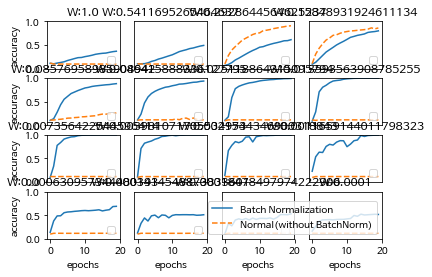

In [25]:
%run batch_norm_test.py

## 6.4 바른 학습을 위해

### 6.4.1 오버피팅

- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

### 6.4.2 가중치 감소

- 오버피팅 억제용으로 많이 이용해 온 방법
- 큰 가중치에 대해서는 패널티를 부과해 오버피팅을 억제
- 가중치의 제곱 L2 노름을 손실함수에 더함
- (손실함수) $+ \frac{1}{2} \lambda W^2$
- lambda는 정규화의 세기 조절
- 1/2는 $\frac{1}{2} \lambda W^2$의 미분 결과인 $\lambda W^2$를 조정하는 상수
- ※ L2 노름: $\sqrt{w_{1}^{2} + w_{2}^{2} + ... + w_{n}^{2}}$

#### MNIST 데이터 중 300개만 사용하고, 7층 네트워크를 사용한 모델

epoch:0, train acc:0.09333333333333334, test acc:0.0982
epoch:1, train acc:0.14666666666666667, test acc:0.1159
epoch:2, train acc:0.17666666666666667, test acc:0.1341
epoch:3, train acc:0.19333333333333333, test acc:0.1468
epoch:4, train acc:0.19666666666666666, test acc:0.1556
epoch:5, train acc:0.21, test acc:0.1672
epoch:6, train acc:0.22666666666666666, test acc:0.1788
epoch:7, train acc:0.25, test acc:0.1927
epoch:8, train acc:0.25666666666666665, test acc:0.1984
epoch:9, train acc:0.26, test acc:0.2046
epoch:10, train acc:0.28, test acc:0.2183
epoch:11, train acc:0.2866666666666667, test acc:0.2268
epoch:12, train acc:0.2966666666666667, test acc:0.2322
epoch:13, train acc:0.30333333333333334, test acc:0.2351
epoch:14, train acc:0.31666666666666665, test acc:0.2419
epoch:15, train acc:0.3233333333333333, test acc:0.2459
epoch:16, train acc:0.32666666666666666, test acc:0.2516
epoch:17, train acc:0.34, test acc:0.2617
epoch:18, train acc:0.3466666666666667, test acc:0.267
epoch:1

epoch:159, train acc:0.82, test acc:0.687
epoch:160, train acc:0.8166666666666667, test acc:0.6865
epoch:161, train acc:0.8333333333333334, test acc:0.6834
epoch:162, train acc:0.8366666666666667, test acc:0.6873
epoch:163, train acc:0.8366666666666667, test acc:0.6919
epoch:164, train acc:0.8333333333333334, test acc:0.6898
epoch:165, train acc:0.84, test acc:0.688
epoch:166, train acc:0.8433333333333334, test acc:0.6928
epoch:167, train acc:0.8366666666666667, test acc:0.6919
epoch:168, train acc:0.8233333333333334, test acc:0.6856
epoch:169, train acc:0.84, test acc:0.6856
epoch:170, train acc:0.84, test acc:0.6896
epoch:171, train acc:0.8333333333333334, test acc:0.6869
epoch:172, train acc:0.8233333333333334, test acc:0.6869
epoch:173, train acc:0.8333333333333334, test acc:0.6895
epoch:174, train acc:0.8366666666666667, test acc:0.6898
epoch:175, train acc:0.8233333333333334, test acc:0.685
epoch:176, train acc:0.8266666666666667, test acc:0.684
epoch:177, train acc:0.83, test ac

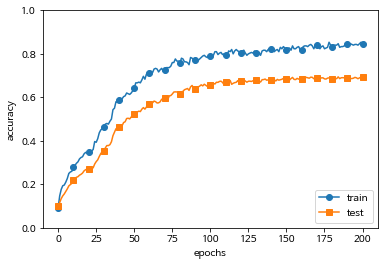

In [26]:
%run overfit_weight_decay.py

### 6.4.3 드롭아웃

- 신경망 모형이 너무 복잡해지면 가중치 감소만으로 대응하기 어려워짐
- 노드를 임의로 삭제하면서 학습하는 방법
- 은닉층의 노드를 무작위로 골라 삭제
- 시험 때는 각 노드의 출력에 훈련 때 삭제한 비율을 곱하여 출력(꼭 곱하지 않아도?)

#### 드롭아웃의 구현

In [27]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0, - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

- self.mask는 x와 형상이 같은 배열을 무작위로 생성
- self.mask에 삭제할 노드를 False로 표시한다는 것이 핵심
- dropout_ratio보다 큰 원소만 True로 설정

#### 드롭아웃의 효과 확인

train loss:2.3106972577721114
=== epoch:1, train acc:0.06, test acc:0.0691 ===
train loss:2.3051077112596
train loss:2.3012062104627193
train loss:2.3065931083275824
=== epoch:2, train acc:0.06666666666666667, test acc:0.0689 ===
train loss:2.3045935628031162
train loss:2.3072812064242485
train loss:2.301139726532982
=== epoch:3, train acc:0.06666666666666667, test acc:0.0687 ===
train loss:2.3018760813652843
train loss:2.3063516912773143
train loss:2.3082829391982527
=== epoch:4, train acc:0.07666666666666666, test acc:0.0686 ===
train loss:2.297203303590317
train loss:2.3087010988238887
train loss:2.3029733371454175
=== epoch:5, train acc:0.07666666666666666, test acc:0.0706 ===
train loss:2.287763370897197
train loss:2.3063371118140172
train loss:2.3085021425848886
=== epoch:6, train acc:0.08333333333333333, test acc:0.0744 ===
train loss:2.3031205989102626
train loss:2.300400727588814
train loss:2.28856290855269
=== epoch:7, train acc:0.09, test acc:0.0775 ===
train loss:2.28854379

=== epoch:57, train acc:0.3333333333333333, test acc:0.2641 ===
train loss:2.242668930641535
train loss:2.2435399849381525
train loss:2.228283520906796
=== epoch:58, train acc:0.3466666666666667, test acc:0.2688 ===
train loss:2.230766170690101
train loss:2.2466113228086892
train loss:2.2501505112484113
=== epoch:59, train acc:0.35, test acc:0.2666 ===
train loss:2.2401726483297146
train loss:2.233597430144967
train loss:2.227362813019097
=== epoch:60, train acc:0.3333333333333333, test acc:0.2639 ===
train loss:2.2281200071165084
train loss:2.230870578031683
train loss:2.237384139170784
=== epoch:61, train acc:0.33666666666666667, test acc:0.2642 ===
train loss:2.2402409992807986
train loss:2.21738193762653
train loss:2.236094083077971
=== epoch:62, train acc:0.3433333333333333, test acc:0.267 ===
train loss:2.240634488656289
train loss:2.2404280640114065
train loss:2.2563297076510973
=== epoch:63, train acc:0.3466666666666667, test acc:0.2674 ===
train loss:2.24204131128585
train los

=== epoch:113, train acc:0.38333333333333336, test acc:0.3112 ===
train loss:2.128196653301166
train loss:2.156699395026293
train loss:2.124457593230458
=== epoch:114, train acc:0.39666666666666667, test acc:0.3183 ===
train loss:2.1469375082202906
train loss:2.1547557336725025
train loss:2.0958860640932144
=== epoch:115, train acc:0.39666666666666667, test acc:0.3245 ===
train loss:2.1104234532633215
train loss:2.1283527198767995
train loss:2.1277149436214806
=== epoch:116, train acc:0.4033333333333333, test acc:0.3269 ===
train loss:2.1161078029773677
train loss:2.167373858217775
train loss:2.1197216196644506
=== epoch:117, train acc:0.41, test acc:0.331 ===
train loss:2.142605167760922
train loss:2.127906073778355
train loss:2.09608417614981
=== epoch:118, train acc:0.39666666666666667, test acc:0.3291 ===
train loss:2.122321836378759
train loss:2.1362770758241796
train loss:2.1017257525424355
=== epoch:119, train acc:0.4, test acc:0.3253 ===
train loss:2.1032076166156006
train loss

=== epoch:168, train acc:0.44666666666666666, test acc:0.37 ===
train loss:1.9347788901802425
train loss:1.9267735990295396
train loss:1.981291660483919
=== epoch:169, train acc:0.4533333333333333, test acc:0.3718 ===
train loss:1.8949078157417538
train loss:1.8622876840392248
train loss:1.8843246516912993
=== epoch:170, train acc:0.44666666666666666, test acc:0.3702 ===
train loss:1.8972033528577605
train loss:1.8718973839230453
train loss:1.9619429278261373
=== epoch:171, train acc:0.4533333333333333, test acc:0.3721 ===
train loss:1.8733464987806092
train loss:1.9037139141814237
train loss:1.933822433748589
=== epoch:172, train acc:0.4533333333333333, test acc:0.3722 ===
train loss:1.9228765693024246
train loss:1.9597754732651247
train loss:1.8195315695560261
=== epoch:173, train acc:0.4633333333333333, test acc:0.3742 ===
train loss:1.8985143237796347
train loss:1.9576722633368318
train loss:1.9619089310148121
=== epoch:174, train acc:0.4666666666666667, test acc:0.3784 ===
train l

=== epoch:223, train acc:0.49333333333333335, test acc:0.4098 ===
train loss:1.6538323047310006
train loss:1.6991463923478773
train loss:1.7262948391091464
=== epoch:224, train acc:0.49333333333333335, test acc:0.4125 ===
train loss:1.6169224416486088
train loss:1.7662448553619914
train loss:1.7784105415836462
=== epoch:225, train acc:0.49666666666666665, test acc:0.4138 ===
train loss:1.6930992737583495
train loss:1.8033642472103215
train loss:1.867994317704607
=== epoch:226, train acc:0.49333333333333335, test acc:0.4152 ===
train loss:1.6798696535812256
train loss:1.5999993136491348
train loss:1.6786095008243729
=== epoch:227, train acc:0.5, test acc:0.4165 ===
train loss:1.709346779267145
train loss:1.5614868140086506
train loss:1.6117485447431235
=== epoch:228, train acc:0.5033333333333333, test acc:0.4202 ===
train loss:1.7306194108147397
train loss:1.6201896579734905
train loss:1.8298287165993399
=== epoch:229, train acc:0.5033333333333333, test acc:0.4207 ===
train loss:1.62171

=== epoch:278, train acc:0.5766666666666667, test acc:0.4726 ===
train loss:1.4457300237188369
train loss:1.4818149719378757
train loss:1.3795090653539575
=== epoch:279, train acc:0.5733333333333334, test acc:0.4732 ===
train loss:1.4721947451146196
train loss:1.4461304290826036
train loss:1.4795238352959188
=== epoch:280, train acc:0.5833333333333334, test acc:0.473 ===
train loss:1.318503535374802
train loss:1.5492982475152821
train loss:1.4331204313834305
=== epoch:281, train acc:0.5733333333333334, test acc:0.4723 ===
train loss:1.3134125012909832
train loss:1.4507653441992254
train loss:1.3961386882104827
=== epoch:282, train acc:0.57, test acc:0.4716 ===
train loss:1.491076429859181
train loss:1.387631127696746
train loss:1.3976418832643671
=== epoch:283, train acc:0.5766666666666667, test acc:0.4743 ===
train loss:1.4859991880806651
train loss:1.3074934918142282
train loss:1.3117271520556688
=== epoch:284, train acc:0.5766666666666667, test acc:0.4774 ===
train loss:1.4362351865

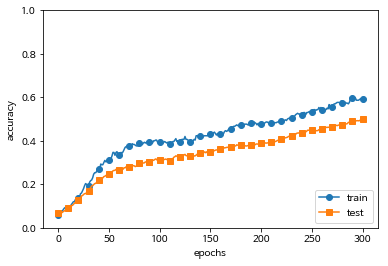

In [28]:
%run overfit_dropout.py

- 훈련 데이터와 테스트 데이터의 차이가 보통보다 줄어있음
- 앙상블 모형과 비슷한 효과

## 6.5 적절한 하이퍼파라미터 값 찾기

### 6.5.1 검증 데이터

- 하이퍼파라미터의 값을 최대한 효율적으로 탐색하기 위한 방법
- 시험 데이터를 사용하지 않는게 중요한 포인트

#### 검증 데이터 분류 예시

In [30]:
from common.util import shuffle_dataset

# 훈련 데이터를 섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.2 하이퍼파라미터 최적화

- 최적값이 존재하는 범위를 조금씩 줄여가는 것이 핵심
- 대략적인 범위를 설정하고 그 범위에서 무작위의 하이퍼파라미터 값으로 정확도를 평가
- 신경망에서는 그리드 서치 같은 규칙적인 탐색보다는 무작위 샘플링이 좋음
- 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 제각각이기 때문
- 로그 스케일로 대략적인 범위를 지정
- 에폭을 작게 해, 1회 평가에 걸리는 시간을 단축하는 것이 효과적
- 베이즈 최적화 방법도 있으니 확인!

### 6.5.3 하이퍼파라미터 최적화 구현하기

#### 가중치 감소 계수를 탐색하는 문제

In [31]:
# 하이퍼파라미터의 무작위 추출 코드
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

val acc:0.11 | lr:1.8382395068494542e-05, weight decay:9.602072439028991e-08
val acc:0.14 | lr:5.791072864199945e-05, weight decay:2.7920952191320643e-06
val acc:0.15 | lr:6.792156141163666e-06, weight decay:1.8436531469835667e-08
val acc:0.53 | lr:0.0037576068966271984, weight decay:1.4181272664108664e-08
val acc:0.75 | lr:0.007975585336198202, weight decay:7.052571857521485e-05
val acc:0.21 | lr:0.0005629199053826736, weight decay:2.70156157135684e-07
val acc:0.7 | lr:0.005862357764267012, weight decay:6.590985201434283e-07
val acc:0.71 | lr:0.00563312572446153, weight decay:7.917787600183884e-06
val acc:0.1 | lr:6.36969274954693e-05, weight decay:6.354924800697437e-06
val acc:0.07 | lr:1.055824280694622e-05, weight decay:1.0521697014147503e-08
val acc:0.09 | lr:9.938036901957233e-05, weight decay:2.2096860485376165e-06
val acc:0.23 | lr:0.002101755426880894, weight decay:7.124040032877652e-08
val acc:0.08 | lr:6.312226677883085e-06, weight decay:5.2493344740821455e-05
val acc:0.36 |

Best-16(val acc:0.58) | lr:0.0051295028727385596, weight decay:1.851463006203158e-08
Best-17(val acc:0.58) | lr:0.0025614145221075917, weight decay:8.010732910568892e-06
Best-18(val acc:0.53) | lr:0.0037576068966271984, weight decay:1.4181272664108664e-08
Best-19(val acc:0.47) | lr:0.0031572995351260933, weight decay:1.0664354543510102e-06
Best-20(val acc:0.47) | lr:0.002808004418218316, weight decay:1.197378757259729e-05


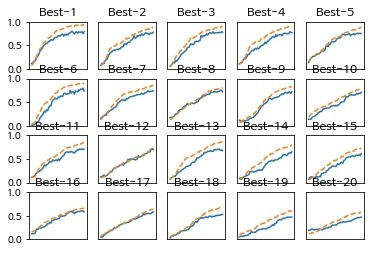

In [32]:
%run hyperparameter_optimization.py

- 학습률은 0.001~0.01, 가중치 감소 계수는 $10^{-8}~10^{-6}$ 정도
- 축소된 범위로 똑같은 작업

## 6.6 정리